In [2]:
!pip install opencv-contrib-python==4.4.0.44

**Import libraries**

In [3]:
import cv2
print(cv2.__version__)

4.4.0


In [4]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from tensorflow.keras.activations import linear, sigmoid, tanh, relu

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,accuracy_score, classification_report
from sklearn.cluster import KMeans

from scipy.cluster.vq import kmeans,vq
from scipy import ndimage
from scipy.spatial import distance
from skimage.feature import hog, local_binary_pattern
from natsort import natsorted

from string import ascii_uppercase

2022-03-21 14:49:16.592410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-21 14:49:16.592430: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


**Loading data from module data_augmentation**

importing Jupyter notebook from data_augmentation.ipynb
Classes of our dataset are: ['jhon', 'gilber']
Dimension of current image 1 (1445, 1013, 3)
Dimension of current image 2 (807, 525, 3)
The array has: 22 images
Dimension of the resize: (256, 256, 3)
Dataset has 110 images with 110 labels
We have 88 images for training & 22 for testing
with a dimension of (256, 256, 3) per image


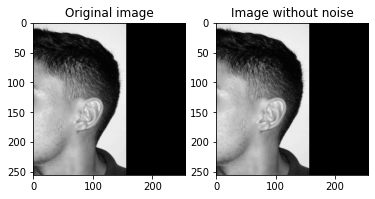

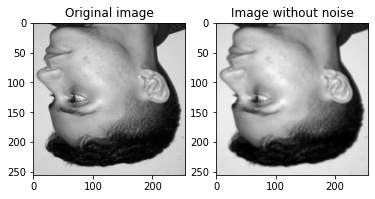

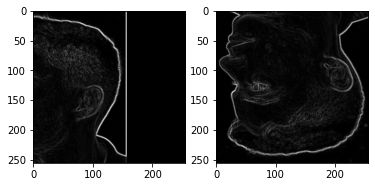

88


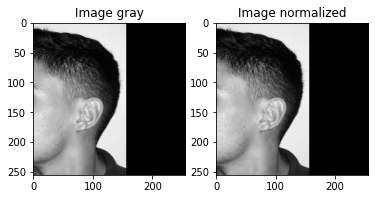

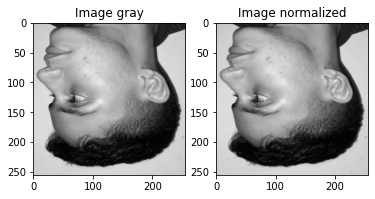

In [5]:
import import_ipynb

# Import module data-augmentation
from data_augmentation import x_train, x_test, y_train, y_test, x_train_norm, x_test_norm, x_train_gray, x_test_gray

**HOG METHOD**

**function to extract training features**

In [6]:
features_train = []
HoG_train = []

def hogTrain(images):
  for image in images:
    fd_train, hog_train = hog(image = image, orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), block_norm = 'L2', visualize = True, channel_axis = True)
    features_train.append(fd_train)
    HoG_train.append(hog_train)
  
  f_train = features_train[:len(images)]
  hog_train = HoG_train[:len(images)]

  return f_train, hog_train  

**Function to extract testing features**

In [7]:
features_test = []
HoG_test = []

def hogTest(images):
  for image in images:
    fd_test, hog_test = hog(image = image, orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), block_norm = 'L2', visualize = True, channel_axis = True)
    features_test.append(fd_test)
    HoG_test.append(hog_test)
  
  f_test = features_test[:len(images)]
  hog_test = HoG_test[:len(images)]

  return f_test, hog_test  

**Save features & images given by HoG method**

In [8]:
# Training data
hog_features_train = hogTrain(x_train)[0]
hog_images_train = hogTrain(x_train)[1]

# Testing data
hog_features_test = hogTest(x_test)[0]
hog_images_test = hogTest(x_test)[1]

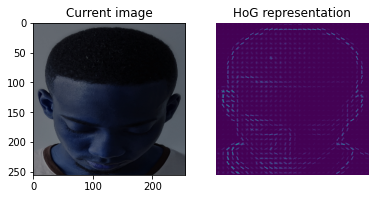

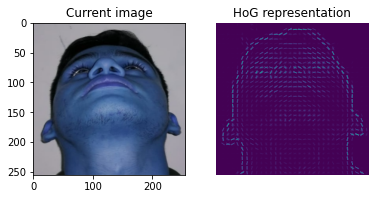

In [9]:
plt.subplot(1,2,1), plt.imshow(x_train[10]), plt.title('Current image')
plt.subplot(1,2,2), plt.imshow(hog_images_train[10]), plt.title('HoG representation')
plt.axis('off')
plt.show()

plt.subplot(1,2,1), plt.imshow(x_train[22]), plt.title('Current image')
plt.subplot(1,2,2), plt.imshow(hog_images_train[22]), plt.title('HoG representation')
plt.axis('off')
plt.show()

 **CREATING MODELS AND CLUSTER**

1. Define a function that return true classes given by y_test.
2. Create structure of the models (Multilayer Perceptron MLP, Support Vector Classifier (SVC)).
3. Create clustering with Kmeans, this is going to be the input of our models.

**True classes function**

In [10]:
true_classes = []

def trueClass():
  for i in y_test:
      if i==1:
          true_classes.append("gilber")
      else:
          true_classes.append("jhon")
  true = true_classes[:len(y_test)]
  return true

true_classes = trueClass()

**Multi-Layer Perceptron (MLP)**

In [11]:
mlp_classifier_hog = MLPClassifier(hidden_layer_sizes=(100,), activation = "relu", learning_rate="constant", random_state=1, max_iter=1000, verbose = True)

**Support Vector Classifier (SVC)**

In [12]:
svc_classifier = LinearSVC(dual=True, loss='squared_hinge', max_iter=80000, multi_class='ovr', penalty='l2')

**IMPLEMENTATION USING HOG**

**Training & validation MLP model**

In [13]:
mlp_model_hog = mlp_classifier_hog.fit(hog_features_train, y_train.flatten())

Iteration 1, loss = 0.71965250
Iteration 2, loss = 0.27680884
Iteration 3, loss = 2.59011113
Iteration 4, loss = 0.17244930
Iteration 5, loss = 1.75128649
Iteration 6, loss = 0.26935033
Iteration 7, loss = 0.11239359
Iteration 8, loss = 0.34946332
Iteration 9, loss = 0.40479653
Iteration 10, loss = 0.17814292
Iteration 11, loss = 0.04207839
Iteration 12, loss = 0.01672069
Iteration 13, loss = 0.04996617
Iteration 14, loss = 0.11320382
Iteration 15, loss = 0.11138585
Iteration 16, loss = 0.05816180
Iteration 17, loss = 0.02075036
Iteration 18, loss = 0.00687369
Iteration 19, loss = 0.00312674
Iteration 20, loss = 0.00266560
Iteration 21, loss = 0.00352642
Iteration 22, loss = 0.00508895
Iteration 23, loss = 0.00703581
Iteration 24, loss = 0.00892149
Iteration 25, loss = 0.01022533
Iteration 26, loss = 0.01057112
Iteration 27, loss = 0.00989143
Iteration 28, loss = 0.00848504
Iteration 29, loss = 0.00680198
Iteration 30, loss = 0.00521026
Iteration 31, loss = 0.00389600
Training loss did

**Prediciton of the model**

In [14]:
hog_mlp_pred = mlp_model_hog.predict(hog_features_test)

In [15]:
predict_hog_mlp = []

for i in hog_mlp_pred:
    if i==1:
        predict_hog_mlp.append("gilber")
    else:
        predict_hog_mlp.append("jhon")

print("True classes:")
print("")
print(true_classes)
print("")
print("Predicted classes - MLPxHoG:")
print("")
print(predict_hog_mlp)

#column_name = ['True Classes', 'Predicted Classes']
#matrix_mlp = np.c_[y_test,hog_mlp_pred]
#compare_matrix_mlp = pd.DataFrame(data=matrix_mlp,columns=column_name)
#compare_matrix_mlp

True classes:

['gilber', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'gilber', 'gilber', 'jhon', 'gilber', 'gilber', 'gilber', 'gilber', 'gilber', 'gilber', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'gilber', 'gilber']

Predicted classes - MLPxHoG:

['gilber', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'gilber', 'gilber', 'gilber', 'jhon', 'gilber', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'gilber', 'jhon']


**Accuracy HOG MLP**

In [16]:
accuracy_hog = accuracy_score(true_classes, predict_hog_mlp)
print(accuracy_hog)

0.7727272727272727


**Training & validation SVC model**

In [17]:
svc_model_hog = svc_classifier.fit(hog_features_train, y_train.flatten())

**Prediciton of the model**

In [18]:
hog_svc_pred = svc_model_hog.predict(hog_features_test)

In [19]:
predict_hog_svc = []

for i in hog_svc_pred:
    if i == 1:
        predict_hog_svc.append("gilber")
    else:
        predict_hog_svc.append("jhon")

print("True classes")
print("")
print(true_classes)
print("")
print("Predicted classes - SVCxHoG")
print("")
print(predict_hog_svc)

True classes

['gilber', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'gilber', 'gilber', 'jhon', 'gilber', 'gilber', 'gilber', 'gilber', 'gilber', 'gilber', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'gilber', 'gilber']

Predicted classes - SVCxHoG

['gilber', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'gilber', 'jhon', 'gilber', 'gilber', 'gilber', 'gilber', 'gilber', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'jhon', 'gilber', 'gilber']


**Accuracy HOG SVC**

In [20]:
accuracy_hog_svc = accuracy_score(true_classes, predict_hog_svc)
print(accuracy_hog_svc)

0.9090909090909091


**CONFUSIONS MATRIX**

**Confusion matrix - MLPxHOG**

In [21]:
print(classification_report(y_test.flatten(), hog_mlp_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.55      0.71        11

    accuracy                           0.77        22
   macro avg       0.84      0.77      0.76        22
weighted avg       0.84      0.77      0.76        22



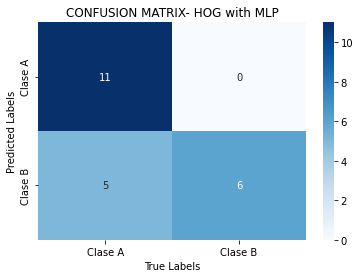

In [22]:
confm_mlp_hog = confusion_matrix(y_test.flatten(), hog_mlp_pred)
columna_hog_mlp = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(hog_mlp_pred))]]
df_cm_hog_mlp = pd.DataFrame(confm_mlp_hog, index= columna_hog_mlp, columns = columna_hog_mlp)

graph_cm_hog_mlp = sns.heatmap(df_cm_hog_mlp, cmap=plt.cm.Blues, annot = True)

plt.title('CONFUSION MATRIX- HOG with MLP')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

**Confusion matrix - SVCxHOG**

In [23]:
print(classification_report(y_test.flatten(), hog_svc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.82      0.90        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22



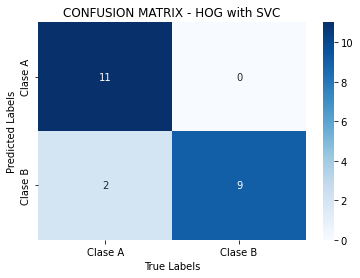

In [24]:
confm_svc_hog = confusion_matrix(y_test.flatten(), hog_svc_pred)
columna_hog_svc = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(hog_svc_pred))]]
df_cm_hog_svc = pd.DataFrame(confm_svc_hog, index= columna_hog_svc, columns = columna_hog_svc)

graph_cm_hog_svc = sns.heatmap(df_cm_hog_svc, cmap=plt.cm.Blues, annot = True)

plt.title('CONFUSION MATRIX - HOG with SVC')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()